In [33]:
from utils import *
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

In [34]:
data = importdphidetarange(0, 2)
phi = data["phi"]

eta = data["eta"]


importdphidetarange not implemented yet
importing event  1
importing event  2


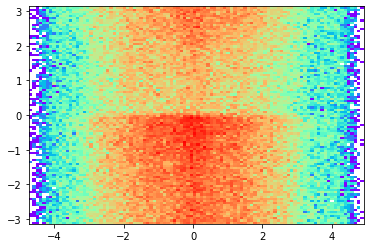

In [35]:
counts,xbins,ybins,image = plt.hist2d(eta,phi,bins=100,norm=LogNorm(), cmap = plt.cm.rainbow)

MemoryError: Unable to allocate 215. GiB for an array with shape (169886, 169886) and data type float64

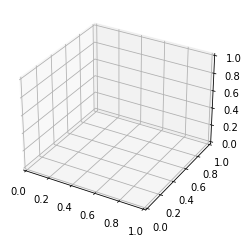

In [36]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = phi
Y = eta
X, Y = np.meshgrid(X, Y)
Z = counts

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 0.04)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Event 0 to 9')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/event_0to99_d.png')
plt.show()

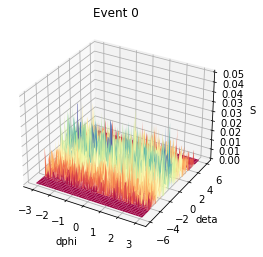

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_0_dx
Y = event_0_dy
X, Y = np.meshgrid(X, Y)
Z = event_0_dz

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 0.05)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Event 0')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/event_0_d.png')
plt.show()